# Análise dos dados 
Temos que refazer os passos para estudar os dados e deixar nosso algoritmo mais certeiro

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

dataset = pd.read_csv('db/movie_dataset.csv', sep=',',  index_col=0, na_values='?')

dataset = dataset.loc[:, ~dataset.columns.isin(['original_title', 'overview', 'tagline', 'title', 'homepage', 'crew', 'keywords', 'original_language', 'id'])]
dataset = dataset.loc[dataset['status'] == 'Released']

Dataset base para manipulação dos dados

In [2]:
dataset_base = dataset.loc[:, dataset.columns.isin(['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count'])]
noise = np.random.randint(0, 101, size=dataset_base['revenue'].shape[0])
dataset_base['revenue'] = dataset_base['revenue'] + noise


/tmp/ipykernel_18650/3099180693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_base['revenue'] = dataset_base['revenue'] + noise


Separando as categorias de renda

In [3]:
dataset_base_rev_class = pd.qcut(dataset_base['revenue'], q=4, labels=['very low', 'low', 'medium', 'high'])
dataset_base['revenue'] = dataset_base_rev_class
dataset_base

/tmp/ipykernel_18650/2109934770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_base['revenue'] = dataset_base_rev_class


,budget,popularity,revenue,runtime,vote_average,vote_count
index,,,,,,
0,237000000,150.437577,high,162.0,7.2,11800
1,300000000,139.082615,high,169.0,6.9,4500
2,245000000,107.376788,high,148.0,6.3,4466
3,250000000,112.312950,high,165.0,7.6,9106
4,260000000,43.926995,high,132.0,6.1,2124
...,...,...,...,...,...,...
4798,220000,14.269792,low,81.0,6.6,238
4799,9000,0.642552,very low,85.0,5.9,5
4800,0,1.444476,very low,120.0,7.0,6


Separando os dummies

In [4]:
dataset_dummies = dataset.loc[:, ~dataset.columns.isin(['budget', 'id', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count'])]
dataset_dummies = pd.get_dummies(dataset_dummies)

Separando os elementos para predição da renda

In [5]:
rev_pred_paramX = dataset_base.loc[:, dataset_base.columns != 'revenue'] 
rev_pred_paramY = np.array(dataset_base.loc[:, dataset_base.columns == 'revenue']).ravel()
rev_pred_paramY = pd.Series(rev_pred_paramY)

In [6]:
dataset_base.describe()

,budget,popularity,runtime,vote_average,vote_count
count,4.795000e+03,4795.000000,4793.000000,4795.000000,4795.000000
mean,2.909267e+07,21.527415,106.915084,6.093306,691.360792
std,4.073962e+07,31.831547,22.570343,1.190313,1235.298140
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+05,4.723880,94.000000,5.600000,54.000000
50%,1.500000e+07,12.963328,104.000000,6.200000,236.000000
75%,4.000000e+07,28.352222,118.000000,6.800000,738.000000
max,3.800000e+08,875.581305,338.000000,10.000000,13752.000000


array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'vote_count'}>, <Axes: >]], dtype=object)

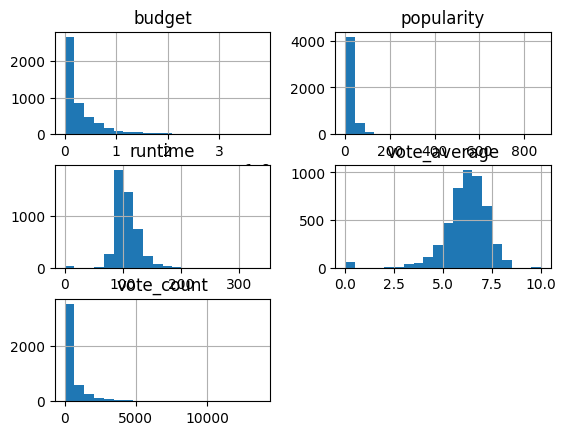

In [7]:
dataset_base[['revenue','budget', 'popularity', 'runtime', 'vote_average', 'vote_count']].hist(bins=20)

<Axes: xlabel='revenue', ylabel='count'>

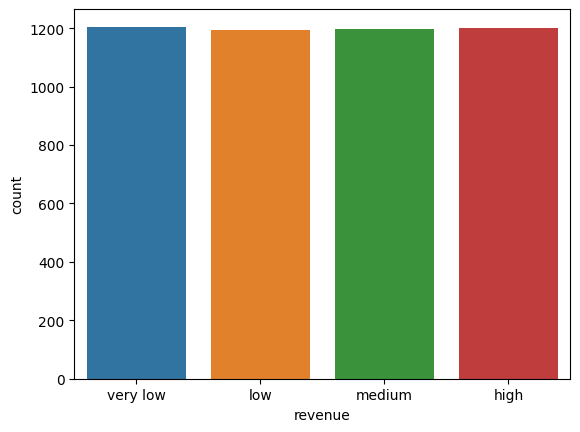

In [8]:
# calculate the counts of unique values in 'revenue'
value_counts = dataset_base['revenue'].value_counts()

# create a dataframe from value_counts
aux = pd.DataFrame(value_counts).reset_index()

# rename the columns
aux.columns = ['revenue', 'count']

# plot the bar plot
sns.barplot(x='revenue', y='count', data=aux)

/tmp/ipykernel_18650/2441492724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_base['Revenue level'] = dataset_base['revenue'].replace({0 : 'very low', 1 : 'low', 2 : 'medium', 3 : 'high'})


<Axes: xlabel='budget', ylabel='Density'>

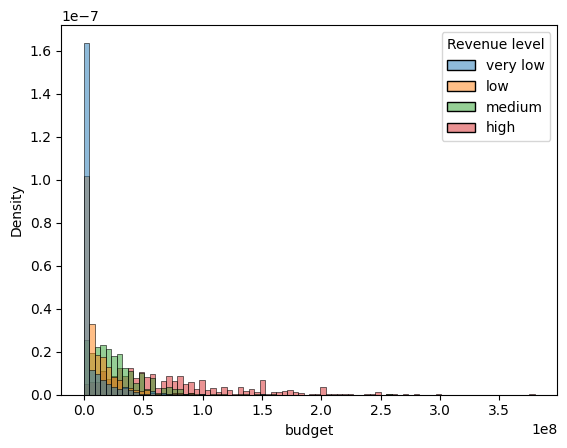

In [9]:
# criar uma nova coluna com a descrição da classe
dataset_base['Revenue level'] = dataset_base['revenue'].replace({0 : 'very low', 1 : 'low', 2 : 'medium', 3 : 'high'})
# plota o histograme para as duas classes com o atributo 'mean radius'
sns.histplot(x='budget', hue='Revenue level', discrete=False,  stat='density', common_norm=False, 
             data=dataset_base)

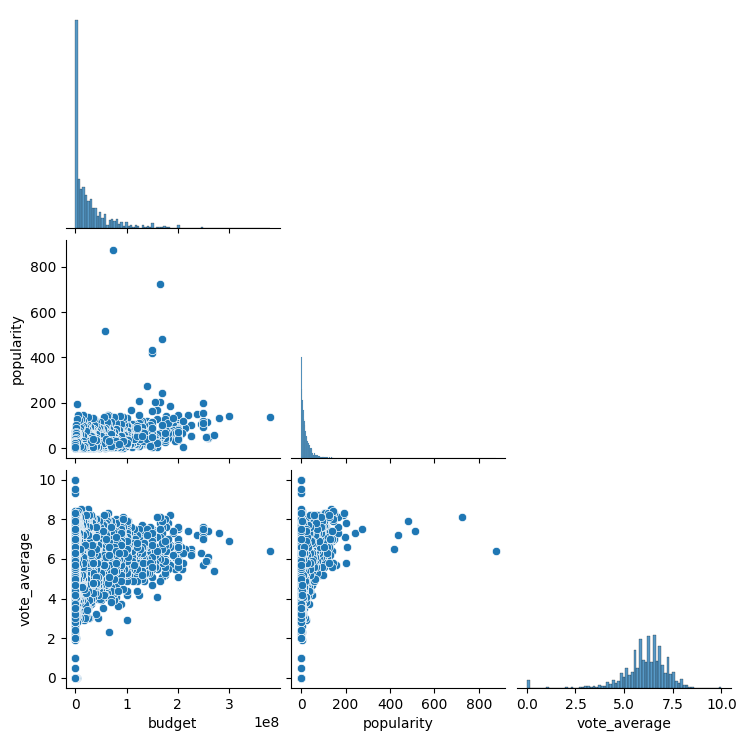

In [10]:
# tirar a correlação entre 3 atributos, senão ia ficar uma imagem muito grande
sns.pairplot(dataset[['budget', 'popularity', 'vote_average']], corner=True)